## Hyperparameter Tuning

In [2]:
from ray import tune 

config = {
    'mode': 'train',
    'use_ray': True,
    'results_dir': '/notebooks/outputs',
    'model': 'dropout_net',
    'batch_size': 32,
    'epochs': 25,
    'lr': tune.grid_search([7e-4, 9e-4, 1e-3, 5e-3]),
    'momentum': tune.grid_search([0.95, 0.99]),
    'max_norm_constraint': 4,
    'drop_in': 0.1, 
    'drop_conv': tune.grid_search([0.1, 0.25]), 
    'drop_fc': 0.5}

In [3]:
from metorch.train import train

from ray.tune.tuner import Tuner
from ray.air.config import ScalingConfig, CheckpointConfig, RunConfig

tuner = tune.Tuner(
    tune.with_resources(
        tune.with_parameters(train),
        resources={"cpu": 2, "gpu": 0.5}),
    tune_config=tune.TuneConfig(metric='validation_metric', mode='max'),
    run_config = RunConfig(local_dir=config['results_dir'], checkpoint_config=CheckpointConfig(num_to_keep=1)),
    param_space=config,)

results = tuner.fit()

2022-10-08 17:38:22,490	WARNING utils.py:607 -- Ray currently does not support initializing Raywith fractional cpus. Your num_cpus will be truncated from 5.985 to 5.
2022-10-08 17:38:22,556	INFO worker.py:1518 -- Started a local Ray instance.
2022-10-08 17:38:23,658	WARNING function_trainable.py:620 -- Function checkpointing is disabled. This may result in unexpected behavior when using checkpointing features or certain schedulers. To enable, set the train function arguments to be `func(config, checkpoint_dir=None)`.


Trial name,status,loc,drop_conv,lr,momentum,iter,total time (s),training_loss,validation_loss,validation_metric
train_020ae_00000,TERMINATED,10.42.1.248:396,0.1,0.0007,0.95,25,981.02,0.402368,0.711097,0.72984
train_020ae_00001,TERMINATED,10.42.1.248:431,0.25,0.0007,0.95,25,985.596,0.549861,0.639323,0.746899
train_020ae_00002,TERMINATED,10.42.1.248:396,0.1,0.0009,0.95,25,961.697,0.420183,0.670038,0.73091
train_020ae_00003,TERMINATED,10.42.1.248:431,0.25,0.0009,0.95,25,973.343,0.547634,0.639642,0.743307
train_020ae_00004,TERMINATED,10.42.1.248:396,0.1,0.001,0.95,25,977.674,0.411184,0.684428,0.735537
train_020ae_00005,TERMINATED,10.42.1.248:431,0.25,0.001,0.95,25,960.671,0.550016,0.655954,0.734946
train_020ae_00006,TERMINATED,10.42.1.248:396,0.1,0.005,0.95,25,980.753,1.56876,1.43004,0.495063
train_020ae_00007,TERMINATED,10.42.1.248:431,0.25,0.005,0.95,25,979.805,1.72962,1.54487,0.455009
train_020ae_00008,TERMINATED,10.42.1.248:396,0.1,0.0007,0.99,25,981.142,1.01655,0.993985,0.655744
train_020ae_00009,TERMINATED,10.42.1.248:431,0.25,0.0007,0.99,25,979.165,1.19262,1.16583,0.592459


(train pid=396) Downloading https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz to ./data/cifar-10-python.tar.gz


 76%|███████▋  | 130025472/170498071 [00:03<00:01, 36171099.03it/s]


(train pid=431) Downloading https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz to ./data/cifar-10-python.tar.gz


 14%|█▍        | 24662016/170498071 [00:01<00:05, 26860327.03it/s]
170499072it [00:04, 35942553.41it/s]                               
 22%|██▏       | 37750784/170498071 [00:01<00:04, 27573077.43it/s]


(train pid=396) Extracting ./data/cifar-10-python.tar.gz to ./data


 98%|█████████▊| 167774208/170498071 [00:05<00:00, 33064260.85it/s]
170499072it [00:05, 29831974.78it/s]                               


(train pid=431) Extracting ./data/cifar-10-python.tar.gz to ./data
Result for train_020ae_00001:
  date: 2022-10-08_17-39-27
  done: false
  experiment_id: ceaebacf2f814173854e26305ec6f363
  hostname: na3gvka6db
  iterations_since_restore: 1
  node_ip: 10.42.1.248
  pid: 431
  time_since_restore: 56.01031756401062
  time_this_iter_s: 56.01031756401062
  time_total_s: 56.01031756401062
  timestamp: 1665250767
  timesteps_since_restore: 0
  training_iteration: 1
  training_loss: 1.9604550374984742
  trial_id: 020ae_00001
  validation_loss: 1.6111537671317688
  validation_metric: 0.3334594372552779
  warmup_time: 0.004882097244262695
  
Result for train_020ae_00000:
  date: 2022-10-08_17-39-27
  done: false
  experiment_id: 0b190c85a2ff40bea192e4e326ffef00
  hostname: na3gvka6db
  iterations_since_restore: 1
  node_ip: 10.42.1.248
  pid: 396
  time_since_restore: 59.67963004112244
  time_this_iter_s: 59.67963004112244
  time_total_s: 59.67963004112244
  timestamp: 1665250767
  timesteps_s

 96%|█████████▌| 163480576/170498071 [00:03<00:00, 50619725.17it/s]
170499072it [00:04, 41434083.79it/s]                               


(train pid=396) Extracting ./data/cifar-10-python.tar.gz to ./data
Result for train_020ae_00001:
  date: 2022-10-08_17-54-56
  done: false
  experiment_id: ceaebacf2f814173854e26305ec6f363
  hostname: na3gvka6db
  iterations_since_restore: 25
  node_ip: 10.42.1.248
  pid: 431
  time_since_restore: 985.5963971614838
  time_this_iter_s: 36.02136754989624
  time_total_s: 985.5963971614838
  timestamp: 1665251696
  timesteps_since_restore: 0
  training_iteration: 25
  training_loss: 0.5498606113016605
  trial_id: 020ae_00001
  validation_loss: 0.6393228106605359
  validation_metric: 0.7468989311030914
  warmup_time: 0.004882097244262695
  
Result for train_020ae_00001:
  date: 2022-10-08_17-54-56
  done: true
  experiment_id: ceaebacf2f814173854e26305ec6f363
  experiment_tag: 1_drop_conv=0.2500,lr=0.0007,momentum=0.9500
  hostname: na3gvka6db
  iterations_since_restore: 25
  node_ip: 10.42.1.248
  pid: 431
  time_since_restore: 985.5963971614838
  time_this_iter_s: 36.02136754989624
  time

 98%|█████████▊| 166386688/170498071 [00:03<00:00, 44200994.69it/s]
170499072it [00:03, 43844750.71it/s]                               


(train pid=431) Extracting ./data/cifar-10-python.tar.gz to ./data
Result for train_020ae_00002:
  date: 2022-10-08_17-55-38
  done: false
  experiment_id: 0b190c85a2ff40bea192e4e326ffef00
  hostname: na3gvka6db
  iterations_since_restore: 1
  node_ip: 10.42.1.248
  pid: 396
  time_since_restore: 50.09017300605774
  time_this_iter_s: 50.09017300605774
  time_total_s: 50.09017300605774
  timestamp: 1665251738
  timesteps_since_restore: 0
  training_iteration: 1
  training_loss: 1.8880607160568237
  trial_id: 020ae_00002
  validation_loss: 1.5018432665937624
  validation_metric: 0.37636651078471317
  warmup_time: 0.004786968231201172
  
Result for train_020ae_00003:
  date: 2022-10-08_17-55-49
  done: false
  experiment_id: ceaebacf2f814173854e26305ec6f363
  hostname: na3gvka6db
  iterations_since_restore: 1
  node_ip: 10.42.1.248
  pid: 431
  time_since_restore: 52.19165110588074
  time_this_iter_s: 52.19165110588074
  time_total_s: 52.19165110588074
  timestamp: 1665251749
  timesteps_

 96%|█████████▋| 164446208/170498071 [00:03<00:00, 49246916.84it/s]
170499072it [00:03, 43438336.31it/s]                               


(train pid=396) Extracting ./data/cifar-10-python.tar.gz to ./data
Result for train_020ae_00003:
  date: 2022-10-08_18-11-10
  done: false
  experiment_id: ceaebacf2f814173854e26305ec6f363
  hostname: na3gvka6db
  iterations_since_restore: 25
  node_ip: 10.42.1.248
  pid: 431
  time_since_restore: 973.3428757190704
  time_this_iter_s: 33.06836295127869
  time_total_s: 973.3428757190704
  timestamp: 1665252670
  timesteps_since_restore: 0
  training_iteration: 25
  training_loss: 0.5476339055895806
  trial_id: 020ae_00003
  validation_loss: 0.6396416947483635
  validation_metric: 0.7433067081104013
  warmup_time: 0.004882097244262695
  
Result for train_020ae_00003:
  date: 2022-10-08_18-11-10
  done: true
  experiment_id: ceaebacf2f814173854e26305ec6f363
  experiment_tag: 3_drop_conv=0.2500,lr=0.0009,momentum=0.9500
  hostname: na3gvka6db
  iterations_since_restore: 25
  node_ip: 10.42.1.248
  pid: 431
  time_since_restore: 973.3428757190704
  time_this_iter_s: 33.06836295127869
  time

 96%|█████████▌| 163357696/170498071 [00:03<00:00, 57013880.59it/s]
170499072it [00:03, 46797615.56it/s]                               


(train pid=431) Extracting ./data/cifar-10-python.tar.gz to ./data
Result for train_020ae_00004:
  date: 2022-10-08_18-11-36
  done: false
  experiment_id: 0b190c85a2ff40bea192e4e326ffef00
  hostname: na3gvka6db
  iterations_since_restore: 1
  node_ip: 10.42.1.248
  pid: 396
  time_since_restore: 45.78935718536377
  time_this_iter_s: 45.78935718536377
  time_total_s: 45.78935718536377
  timestamp: 1665252696
  timesteps_since_restore: 0
  training_iteration: 1
  training_loss: 1.879266800880432
  trial_id: 020ae_00004
  validation_loss: 1.4742998852135656
  validation_metric: 0.3725552889012881
  warmup_time: 0.004786968231201172
  
Result for train_020ae_00005:
  date: 2022-10-08_18-11-58
  done: false
  experiment_id: ceaebacf2f814173854e26305ec6f363
  hostname: na3gvka6db
  iterations_since_restore: 1
  node_ip: 10.42.1.248
  pid: 431
  time_since_restore: 48.35817503929138
  time_this_iter_s: 48.35817503929138
  time_total_s: 48.35817503929138
  timestamp: 1665252718
  timesteps_si

 18%|█▊        | 31234048/170498071 [00:01<00:05, 27664772.39it/s]


Result for train_020ae_00005:
  date: 2022-10-08_18-27-11
  done: false
  experiment_id: ceaebacf2f814173854e26305ec6f363
  hostname: na3gvka6db
  iterations_since_restore: 25
  node_ip: 10.42.1.248
  pid: 431
  time_since_restore: 960.6711618900299
  time_this_iter_s: 37.67824339866638
  time_total_s: 960.6711618900299
  timestamp: 1665253631
  timesteps_since_restore: 0
  training_iteration: 25
  training_loss: 0.5500157339692116
  trial_id: 020ae_00005
  validation_loss: 0.655954294501783
  validation_metric: 0.734945887085611
  warmup_time: 0.004882097244262695
  


 24%|██▍       | 41443328/170498071 [00:01<00:03, 37130167.88it/s]


Result for train_020ae_00005:
  date: 2022-10-08_18-27-11
  done: true
  experiment_id: ceaebacf2f814173854e26305ec6f363
  experiment_tag: 5_drop_conv=0.2500,lr=0.0010,momentum=0.9500
  hostname: na3gvka6db
  iterations_since_restore: 25
  node_ip: 10.42.1.248
  pid: 431
  time_since_restore: 960.6711618900299
  time_this_iter_s: 37.67824339866638
  time_total_s: 960.6711618900299
  timestamp: 1665253631
  timesteps_since_restore: 0
  training_iteration: 25
  training_loss: 0.5500157339692116
  trial_id: 020ae_00005
  validation_loss: 0.655954294501783
  validation_metric: 0.734945887085611
  warmup_time: 0.004882097244262695
  
(train pid=431) Downloading https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz to ./data/cifar-10-python.tar.gz


 60%|██████    | 103035904/170498071 [00:02<00:01, 39729857.39it/s]
170499072it [00:04, 37239831.60it/s]                               
 72%|███████▏  | 122811392/170498071 [00:03<00:01, 44143051.60it/s]


(train pid=396) Extracting ./data/cifar-10-python.tar.gz to ./data


 96%|█████████▌| 163457024/170498071 [00:04<00:00, 50713218.31it/s]
170499072it [00:04, 40589095.16it/s]                               


(train pid=431) Extracting ./data/cifar-10-python.tar.gz to ./data
Result for train_020ae_00006:
  date: 2022-10-08_18-28-00
  done: false
  experiment_id: 0b190c85a2ff40bea192e4e326ffef00
  hostname: na3gvka6db
  iterations_since_restore: 1
  node_ip: 10.42.1.248
  pid: 396
  time_since_restore: 51.935794830322266
  time_this_iter_s: 51.935794830322266
  time_total_s: 51.935794830322266
  timestamp: 1665253680
  timesteps_since_restore: 0
  training_iteration: 1
  training_loss: 1.868302038860321
  trial_id: 020ae_00006
  validation_loss: 1.5842020443072333
  validation_metric: 0.3479698268908844
  warmup_time: 0.004786968231201172
  
Result for train_020ae_00007:
  date: 2022-10-08_18-28-01
  done: false
  experiment_id: ceaebacf2f814173854e26305ec6f363
  hostname: na3gvka6db
  iterations_since_restore: 1
  node_ip: 10.42.1.248
  pid: 431
  time_since_restore: 50.27095890045166
  time_this_iter_s: 50.27095890045166
  time_total_s: 50.27095890045166
  timestamp: 1665253681
  timesteps

 29%|██▉       | 49570816/170498071 [00:01<00:02, 47586589.46it/s]


Result for train_020ae_00007:
  date: 2022-10-08_18-43-30
  done: false
  experiment_id: ceaebacf2f814173854e26305ec6f363
  hostname: na3gvka6db
  iterations_since_restore: 25
  node_ip: 10.42.1.248
  pid: 431
  time_since_restore: 979.8046953678131
  time_this_iter_s: 38.122846603393555
  time_total_s: 979.8046953678131
  timestamp: 1665254610
  timesteps_since_restore: 0
  training_iteration: 25
  training_loss: 1.7296170987606048
  trial_id: 020ae_00007
  validation_loss: 1.5448705936773135
  validation_metric: 0.4550093178102671
  warmup_time: 0.004882097244262695
  


 32%|███▏      | 54919168/170498071 [00:01<00:02, 45573609.53it/s]


Result for train_020ae_00007:
  date: 2022-10-08_18-43-30
  done: true
  experiment_id: ceaebacf2f814173854e26305ec6f363
  experiment_tag: 7_drop_conv=0.2500,lr=0.0050,momentum=0.9500
  hostname: na3gvka6db
  iterations_since_restore: 25
  node_ip: 10.42.1.248
  pid: 431
  time_since_restore: 979.8046953678131
  time_this_iter_s: 38.122846603393555
  time_total_s: 979.8046953678131
  timestamp: 1665254610
  timesteps_since_restore: 0
  training_iteration: 25
  training_loss: 1.7296170987606048
  trial_id: 020ae_00007
  validation_loss: 1.5448705936773135
  validation_metric: 0.4550093178102671
  warmup_time: 0.004882097244262695
  
(train pid=431) Downloading https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz to ./data/cifar-10-python.tar.gz


 96%|█████████▌| 163727360/170498071 [00:04<00:00, 44362029.50it/s]
170499072it [00:04, 41269868.38it/s]                               
 36%|███▌      | 60849152/170498071 [00:02<00:03, 28647234.77it/s]


(train pid=396) Extracting ./data/cifar-10-python.tar.gz to ./data


 96%|█████████▌| 163579904/170498071 [00:05<00:00, 32258400.39it/s]
170499072it [00:06, 28285766.69it/s]                               


(train pid=431) Extracting ./data/cifar-10-python.tar.gz to ./data
Result for train_020ae_00008:
  date: 2022-10-08_18-44-18
  done: false
  experiment_id: 0b190c85a2ff40bea192e4e326ffef00
  hostname: na3gvka6db
  iterations_since_restore: 1
  node_ip: 10.42.1.248
  pid: 396
  time_since_restore: 49.38232970237732
  time_this_iter_s: 49.38232970237732
  time_total_s: 49.38232970237732
  timestamp: 1665254658
  timesteps_since_restore: 0
  training_iteration: 1
  training_loss: 1.8883900035858154
  trial_id: 020ae_00008
  validation_loss: 1.536356421705252
  validation_metric: 0.39733378153490284
  warmup_time: 0.004786968231201172
  
Result for train_020ae_00009:
  date: 2022-10-08_18-44-22
  done: false
  experiment_id: ceaebacf2f814173854e26305ec6f363
  hostname: na3gvka6db
  iterations_since_restore: 1
  node_ip: 10.42.1.248
  pid: 431
  time_since_restore: 51.31823468208313
  time_this_iter_s: 51.31823468208313
  time_total_s: 51.31823468208313
  timestamp: 1665254662
  timesteps_s

 95%|█████████▌| 162186240/170498071 [00:04<00:00, 50281650.83it/s]
170499072it [00:04, 37863049.28it/s]                               
 26%|██▋       | 44794880/170498071 [00:04<00:10, 12375976.82it/s]


(train pid=396) Extracting ./data/cifar-10-python.tar.gz to ./data


 98%|█████████▊| 166964224/170498071 [00:13<00:00, 19430898.42it/s]
170499072it [00:13, 12667265.75it/s]                               


(train pid=431) Extracting ./data/cifar-10-python.tar.gz to ./data
Result for train_020ae_00011:
  date: 2022-10-08_19-00-37
  done: false
  experiment_id: 0b190c85a2ff40bea192e4e326ffef00
  hostname: na3gvka6db
  iterations_since_restore: 1
  node_ip: 10.42.1.248
  pid: 396
  time_since_restore: 47.4605507850647
  time_this_iter_s: 47.4605507850647
  time_total_s: 47.4605507850647
  timestamp: 1665255637
  timesteps_since_restore: 0
  training_iteration: 1
  training_loss: 1.907204641342163
  trial_id: 020ae_00011
  validation_loss: 1.6734904713524035
  validation_metric: 0.3220151836520694
  warmup_time: 0.004786968231201172
  
Result for train_020ae_00010:
  date: 2022-10-08_19-00-48
  done: false
  experiment_id: ceaebacf2f814173854e26305ec6f363
  hostname: na3gvka6db
  iterations_since_restore: 1
  node_ip: 10.42.1.248
  pid: 431
  time_since_restore: 58.52540612220764
  time_this_iter_s: 58.52540612220764
  time_total_s: 58.52540612220764
  timestamp: 1665255648
  timesteps_since

 95%|█████████▌| 162097152/170498071 [00:03<00:00, 50170233.91it/s]
170499072it [00:03, 43581416.75it/s]                               


(train pid=396) Extracting ./data/cifar-10-python.tar.gz to ./data
Result for train_020ae_00010:
  date: 2022-10-08_19-16-09
  done: false
  experiment_id: ceaebacf2f814173854e26305ec6f363
  hostname: na3gvka6db
  iterations_since_restore: 25
  node_ip: 10.42.1.248
  pid: 431
  time_since_restore: 979.0885863304138
  time_this_iter_s: 32.76526236534119
  time_total_s: 979.0885863304138
  timestamp: 1665256569
  timesteps_since_restore: 0
  training_iteration: 25
  training_loss: 1.4015412715435027
  trial_id: 020ae_00010
  validation_loss: 1.2596991465876277
  validation_metric: 0.5382282308460896
  warmup_time: 0.004882097244262695
  
Result for train_020ae_00010:
  date: 2022-10-08_19-16-09
  done: true
  experiment_id: ceaebacf2f814173854e26305ec6f363
  experiment_tag: 10_drop_conv=0.1000,lr=0.0009,momentum=0.9900
  hostname: na3gvka6db
  iterations_since_restore: 25
  node_ip: 10.42.1.248
  pid: 431
  time_since_restore: 979.0885863304138
  time_this_iter_s: 32.76526236534119
  tim

 95%|█████████▌| 162530304/170498071 [00:03<00:00, 53149504.47it/s]
170499072it [00:03, 43523718.24it/s]                               


(train pid=431) Extracting ./data/cifar-10-python.tar.gz to ./data
Result for train_020ae_00012:
  date: 2022-10-08_19-16-41
  done: false
  experiment_id: 0b190c85a2ff40bea192e4e326ffef00
  hostname: na3gvka6db
  iterations_since_restore: 1
  node_ip: 10.42.1.248
  pid: 396
  time_since_restore: 48.28151822090149
  time_this_iter_s: 48.28151822090149
  time_total_s: 48.28151822090149
  timestamp: 1665256601
  timesteps_since_restore: 0
  training_iteration: 1
  training_loss: 1.903989597415924
  trial_id: 020ae_00012
  validation_loss: 1.6502673732586943
  validation_metric: 0.34250118766999976
  warmup_time: 0.004786968231201172
  
Result for train_020ae_00013:
  date: 2022-10-08_19-16-59
  done: false
  experiment_id: ceaebacf2f814173854e26305ec6f363
  hostname: na3gvka6db
  iterations_since_restore: 1
  node_ip: 10.42.1.248
  pid: 431
  time_since_restore: 50.28003215789795
  time_this_iter_s: 50.28003215789795
  time_total_s: 50.28003215789795
  timestamp: 1665256619
  timesteps_s

 97%|█████████▋| 164657152/170498071 [00:03<00:00, 47296397.65it/s]
170499072it [00:03, 42776376.52it/s]                               


(train pid=396) Extracting ./data/cifar-10-python.tar.gz to ./data
Result for train_020ae_00013:
  date: 2022-10-08_19-32-10
  done: false
  experiment_id: ceaebacf2f814173854e26305ec6f363
  hostname: na3gvka6db
  iterations_since_restore: 25
  node_ip: 10.42.1.248
  pid: 431
  time_since_restore: 961.0523011684418
  time_this_iter_s: 35.02481412887573
  time_total_s: 961.0523011684418
  timestamp: 1665257530
  timesteps_since_restore: 0
  training_iteration: 25
  training_loss: 1.6868727095603944
  trial_id: 020ae_00013
  validation_loss: 1.6175195016800024
  validation_metric: 0.3991329971363559
  warmup_time: 0.004882097244262695
  
Result for train_020ae_00013:
  date: 2022-10-08_19-32-10
  done: true
  experiment_id: ceaebacf2f814173854e26305ec6f363
  experiment_tag: 13_drop_conv=0.2500,lr=0.0010,momentum=0.9900
  hostname: na3gvka6db
  iterations_since_restore: 25
  node_ip: 10.42.1.248
  pid: 431
  time_since_restore: 961.0523011684418
  time_this_iter_s: 35.02481412887573
  tim

 96%|█████████▌| 163169280/170498071 [00:03<00:00, 52977152.61it/s]
170499072it [00:03, 43626678.69it/s]                               


(train pid=431) Extracting ./data/cifar-10-python.tar.gz to ./data
Result for train_020ae_00014:
  date: 2022-10-08_19-32-47
  done: false
  experiment_id: 0b190c85a2ff40bea192e4e326ffef00
  hostname: na3gvka6db
  iterations_since_restore: 1
  node_ip: 10.42.1.248
  pid: 396
  time_since_restore: 46.200090169906616
  time_this_iter_s: 46.200090169906616
  time_total_s: 46.200090169906616
  timestamp: 1665257567
  timesteps_since_restore: 0
  training_iteration: 1
  training_loss: 2.2017992420196535
  trial_id: 020ae_00014
  validation_loss: 2.120508452193044
  validation_metric: 0.1220196376812054
  warmup_time: 0.004786968231201172
  
Result for train_020ae_00015:
  date: 2022-10-08_19-32-57
  done: false
  experiment_id: ceaebacf2f814173854e26305ec6f363
  hostname: na3gvka6db
  iterations_since_restore: 1
  node_ip: 10.42.1.248
  pid: 431
  time_since_restore: 46.74042105674744
  time_this_iter_s: 46.74042105674744
  time_total_s: 46.74042105674744
  timestamp: 1665257577
  timesteps

2022-10-08 19:48:25,525	INFO tune.py:759 -- Total run time: 7801.87 seconds (7801.28 seconds for the tuning loop).


{'mode': 'train', 'use_ray': True, 'results_dir': '/notebooks/outputs', 'model': 'dropout_net', 'batch_size': 32, 'epochs': 25, 'lr': 0.0005, 'momentum': 0.95, 'max_norm_constraint': 4, 'drop_in': 0.25, 'drop_conv': 0.5, 'drop_fc': 0.5}
{'mode': 'train', 'use_ray': True, 'results_dir': '/notebooks/outputs', 'model': 'dropout_net', 'batch_size': 32, 'epochs': 25, 'lr': 0.0009, 'momentum': 0.95, 'max_norm_constraint': 4, 'drop_in': 0.1, 'drop_conv': 0.25, 'drop_fc': 0.5}
{'mode': 'train', 'use_ray': True, 'results_dir': '/notebooks/outputs', 'model': 'dropout_net', 'batch_size': 32, 'epochs': 25, 'lr': 0.0007, 'momentum': 0.95, 'max_norm_constraint': 4, 'drop_in': 0.1, 'drop_conv': 0.25, 'drop_fc': 0.5}


<AxesSubplot:>

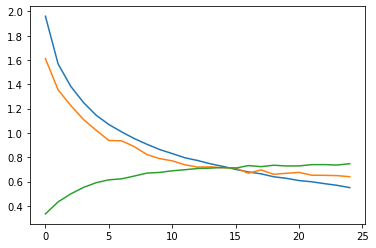

In [2]:
import os
import pandas as pd
from ray import tune

analysis = tune.ExperimentAnalysis("/notebooks/outputs/train_2022-10-08_17-38-21")
best = analysis.get_best_config(metric='validation_metric', mode='max')
print(best)

df = pd.read_csv(os.path.join(analysis.get_best_logdir('validation_metric', 'max'), 'progress.csv'))
df['training_loss'].plot()
df['validation_loss'].plot()
df['validation_metric'].plot()

## Training

In [3]:
#from the paper
config = {
    'mode': 'train',
    'use_ray': False,
    'results_dir': '/notebooks/outputs',
    'model': 'dropout_net',
    'batch_size': 32,
    'epochs': 30,
    'lr': 0.0007,
    'momentum': 0.95,
    'max_norm_constraint': 4,
    'drop_in': 0.1, 
    'drop_conv': 0.25, 
    'drop_fc': 0.5}

In [13]:
# FIXME - OverflowError: cannot serialize a string larger than 4GiB (Error while saving the model)
# from ray.train.torch import TorchTrainer
# from ray.air.config import ScalingConfig, CheckpointConfig, RunConfig


# from metorch.train import train

# run_config = RunConfig(
#     local_dir=config['results_dir'], 
#     checkpoint_config=CheckpointConfig(num_to_keep=1))
# scaling_config=ScalingConfig(
#     num_workers=1, 
#     use_gpu=True, 
#     resources_per_worker={'CPU' :1, 'GPU': 1})

# trainer = TorchTrainer(
#     train, 
#     train_loop_config=config, 
#     scaling_config=scaling_config, 
#     run_config=run_config)

# results = trainer.fit()

In [4]:
from metorch.train import train
train(config)

Files already downloaded and verified
Init loss:  2.530871939277649
Epoch: 0 Training loss: 1.9641523778915406  Validation loss: 1.6179822039680358 Validation metric: 0.333133596963803
Epoch: 1 Training loss: 1.5744453734874726  Validation loss: 1.3539738763635532 Validation metric: 0.4440848185702241
Epoch: 2 Training loss: 1.373276664876938  Validation loss: 1.2000525881307194 Validation metric: 0.5167364194841717
Epoch: 3 Training loss: 1.2385360933303833  Validation loss: 1.097666671291327 Validation metric: 0.5511910395972471
Epoch: 4 Training loss: 1.1495748328208923  Validation loss: 1.0655904473207247 Validation metric: 0.5732499594959806
Epoch: 5 Training loss: 1.0706795892238616  Validation loss: 0.9412099617167403 Validation metric: 0.6167396973385156
Epoch: 6 Training loss: 1.0035616344690323  Validation loss: 0.9191285387014809 Validation metric: 0.6263611486219517
Epoch: 7 Training loss: 0.9438703860282898  Validation loss: 0.8579351152665318 Validation metric: 0.65293770

In [5]:
import os
import torch
import torch.nn as nn
from metorch.test import test
from metorch.models import DropoutNet
from metorch.utils import get_dataloaders

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
config['mode'] = 'test'
model = DropoutNet(config)
model.load_state_dict(torch.load(os.path.join(config['results_dir'], 'model.pth')))
model = model.to(device)
model.eval()
test_loader = get_dataloaders(config)
test_loss, test_metric = test(model, nn.CrossEntropyLoss(), test_loader)
print(test_loss, test_metric)

Files already downloaded and verified
0.6244368000914113 0.7510659747643346


<AxesSubplot:>

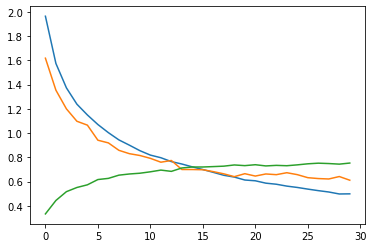

In [7]:
import seaborn
import pandas as pd

progress = pd.read_csv(os.path.join(config['results_dir'], 'progress.csv'))
progress[' Training Loss'].plot()
progress[' Validation Loss'].plot()
progress[' Validation metric'].plot()